In [2]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as et
import xml.etree.cElementTree as ets
from xml.sax import ContentHandler, parse
from simpledbf import Dbf5
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import pysal as ps
from sklearn.metrics import accuracy_score
import sys
import shapefile
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\junaid.raza\AppData\Local\Continuum\anaconda4\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [22]:
#Loading Txt files First

In [ ]:
#Have move the .txt files into txt folder so the path to file easy to use.

In [ ]:
#Reading agency.txt file.

In [3]:
df_txt_agency = pd.read_csv('txt/agency.txt', sep=",")
df_txt_agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,1,PTV,http://www.ptv.vic.gov.au,Australia/Melbourne,EN


In [ ]:
#Reading calender.txt file.

In [4]:
df_txt_calender = pd.read_csv('txt/calendar.txt', sep=",")

#df_txt_calender.head()

In [ ]:
#Reading calendar_dates.txt file.

In [5]:
df_txt_calendar_dates = pd.read_csv('txt/calendar_dates.txt', sep=",")
df_txt_calendar_dates.head()

,service_id,date,exception_type
0,T0,20151103,2
1,T0+a5,20151103,2


In [ ]:
#Reading routes.txt file.

In [6]:
df_txt_routes = pd.read_csv('txt/routes.txt', sep=",")
print (df_txt_routes.head())

        route_id  agency_id route_short_name  \
0  2-ALM-B-mjp-1          1          Alamein   
1  2-ALM-C-mjp-1          1          Alamein   
2  2-ALM-D-mjp-1          1          Alamein   
3  2-ALM-E-mjp-1          1          Alamein   
4  2-ALM-F-mjp-1          1          Alamein   

                    route_long_name  route_type  
0  Alamein - City (Flinders Street)           2  
1  Alamein - City (Flinders Street)           2  
2  Alamein - City (Flinders Street)           2  
3  Alamein - City (Flinders Street)           2  
4  Alamein - City (Flinders Street)           2  


In [ ]:
#Reading shapes.txt file.

In [7]:
df_txt_shapes = pd.read_csv('txt/shapes.txt', sep=",")
df_txt_shapes.head()


,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2-ain-mjp-1.1.H,-37.818631,144.951994,1,0.000000
1,2-ain-mjp-1.1.H,-37.817425,144.951050,2,157.543645
2,2-ain-mjp-1.1.H,-37.817241,144.950828,3,185.827916
3,2-ain-mjp-1.1.H,-37.816327,144.950047,4,308.469671
4,2-ain-mjp-1.1.H,-37.816127,144.949950,5,332.239399


In [ ]:
#Reading stop_times.txt file.

In [8]:
df_txt_stop_times = pd.read_csv('txt/stop_times.txt', sep=",")
df_txt_stop_times.head()


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [ ]:
#Reading stops.txt file.

In [9]:
df_txt_stops = pd.read_csv('txt/stops.txt', sep=",")
df_txt_stops.head()


,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [ ]:
#Reading trips.txt file.

In [10]:
df_txt_trips = pd.read_csv('txt/trips.txt', sep=",")
df_txt_trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [ ]:
#All .txt files are loaded into unique names dataframes

In [ ]:
#Loading rael_state.json file

In [11]:
df_json_real_state = pd.read_json('real_state.json', lines=False)
print (df_json_real_state.head())

          addr_street  bathrooms  bedrooms        lat         lng  \
0     14 Dover Street        1.0       2.0 -37.825818  144.991918   
1    7 Berrywood Walk        2.0       3.0 -37.778532  145.254596   
2  1/45 Barton Street        1.0       3.0 -37.711887  145.003676   
3    20 Almond Avenue        1.0       3.0 -37.821573  144.838464   
4       8 Diosma Road        2.0       4.0 -37.714888  145.167249   

   parking_space      price  property_id property_type    year  
0            1.0  7440000.0      52321.0         house  2016.0  
1            0.0  9600000.0      62215.0         house  2011.0  
2            1.0  5844000.0      33458.0         house  2011.0  
3            2.0  6975000.0       1981.0         house  2010.0  
4            2.0  7200000.0      47536.0         house  2012.0  


In [ ]:
#Loading super_markets.json file

In [12]:
df_json_supermarkets = pd.read_json('supermarkets.json', lines=False)
print (df_json_supermarkets.head())


      id        lat         lng        type
0  S_001 -37.883978  144.735287  Woolworths
1  S_002 -41.161591  147.514797  Woolworths
2  S_003 -37.984078  145.077167  Woolworths
3  S_004 -37.707023  144.938740  Woolworths
4  S_005 -37.597670  144.938413  Woolworths


In [ ]:
#Loading VIC_LOCALITY_POLYGON_shp.dbf file

In [13]:
def dbf2DF(dbfile, upper=True): #Reads in DBF files and returns Pandas DF
    db = ps.open(dbfile) #Pysal to open DBF
    d = {col: db.by_col(col) for col in db.header} #Convert dbf to dictionary
    #pandasDF = pd.DataFrame(db[:]) #Convert to Pandas DF
    pandasDF = pd.DataFrame(d) #Convert to Pandas DF
    if upper == True: #Make columns uppercase if wanted 
        pandasDF.columns = map(str.upper, db.header) 
    db.close() 
    return pandasDF
df_dbf_VIC_LOCALITY_POLYGON_shp = dbf2DF('VIC_LOCALITY_POLYGON_shp.dbf')
print (df_dbf_VIC_LOCALITY_POLYGON_shp.head())

  LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_2  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2017-08-09       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  
0                                G       None          2  
1                                G       None          2  
2                                G       None          2  
3                                G       None          2  
4                                G       None          2  


In [85]:
#Loading VIC_LOCALITY_POLYGON_shp.prj file

In [14]:
def read_shapefile(shp_path):


    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df
name="VIC_LOCALITY_POLYGON_shp.prj"
df_csv_=pd.read_csv('sample.csv')
df_prj_VIC_LOCALITY_POLYGON_shp=read_shapefile(name)
print (df_prj_VIC_LOCALITY_POLYGON_shp.head())

  LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_2  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2017-08-09       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  \
0                                G       None          2   
1                                G       None          2   
2                                G       None          2   
3                                G       None          2   
4                                G       None          2   

                                              coords  
0  [(141.74552399, -35.07228701), (141.74552471, ...  
1  [(148.668767, -37.39571245), (148.66876

In [99]:
#Loading real_state.xml file

In [15]:
tree = et.parse('real_state.xml')
root = tree.getroot()
for child in root:
    print (child.tag, child.attrib)
    
    #print (child)

bathrooms {'type': 'dict'}
price {'type': 'dict'}
bedrooms {'type': 'dict'}
parking_space {'type': 'dict'}
year {'type': 'dict'}
lat {'type': 'dict'}
lng {'type': 'dict'}
property_type {'type': 'dict'}
addr_street {'type': 'dict'}
property_id {'type': 'dict'}


In [16]:
#Have converted the xml real_state.xml file into json and then saved as csv file
df_xml_property=pd.read_csv('generated_from_xml_realstate.csv')
df_xml_property.head()

,Unnamed: 0,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
0,0,2.0,6460000.0,2.0,2.0,2012.0,-37.847017,145.297400,house,9 Lockwoods Road,74068.0
1,1,3.0,15900000.0,4.0,0.0,2012.0,-37.806322,145.040679,house,22 Kent Street,48117.0
2,2,2.0,6900000.0,3.0,2.0,2009.0,-37.697483,145.130493,house,14 Terrigal Place,44285.0
3,3,1.0,21150000.0,3.0,1.0,2015.0,-37.877359,144.979549,house,322 Barkly Street,84877.0
4,4,1.0,3795000.0,3.0,2.0,2013.0,-37.576035,144.930551,house,7 Scarborough Terrace,27637.0


In [ ]:
#Loading VIC_LOCALITY_POLYGON_shp.shx File

In [17]:
def read_shapefiles_shx(shp_path):


    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df
name_shx="VIC_LOCALITY_POLYGON_shp.shx"
df_shx_VIC_LOCALITY_POLYGON_shp=read_shapefiles_shx(name_shx)
print (df_shx_VIC_LOCALITY_POLYGON_shp.head())


  LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_2  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2017-08-09       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  \
0                                G       None          2   
1                                G       None          2   
2                                G       None          2   
3                                G       None          2   
4                                G       None          2   

                                              coords  
0  [(141.74552399, -35.07228701), (141.74552471, ...  
1  [(148.668767, -37.39571245), (148.66876

In [ ]:
#Loading VIC_LOCALITY_POLYGON_shp.shp file

In [18]:
def read_shapefile_shp(shp_path):


    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df
df_shp_VIC_LOCALITY_POLYGON_shp=read_shapefile_shp("VIC_LOCALITY_POLYGON_shp.shp")
print (df_shp_VIC_LOCALITY_POLYGON_shp.head())

  LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_2  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2017-08-09       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  \
0                                G       None          2   
1                                G       None          2   
2                                G       None          2   
3                                G       None          2   
4                                G       None          2   

                                              coords  
0  [(141.74552399, -35.07228701), (141.74552471, ...  
1  [(148.668767, -37.39571245), (148.66876

In [ ]:
#Loading sample.csv file -> As our final dataset schema

In [ ]:
#Loading our loaded dataframes to formulate our final dataset

In [19]:
#Saving first column data to create dataframe in next step.
data=df_xml_property['property_id']
df=pd.DataFrame(data=data)
#Adding the columns to df
df['lat']=df_xml_property['lat']
df['lng']=df_xml_property['lng']
df['addr_street']=df_json_real_state['addr_street']
df['price']=df_xml_property['price']
df['property_type']=df_json_real_state['property_type']
df['year']=df_xml_property['year']
df['bedrooms']=df_json_real_state['bedrooms']
df['bathrooms']=df_json_real_state['bathrooms']
df['parking_space']=df_json_real_state['parking_space']
df['Distance_to_sc']=df_txt_shapes['shape_dist_traveled']
df['train_station_id']=df_txt_stop_times['stop_id']
df['distance_to_train_station']=df_txt_stop_times['shape_dist_traveled'] 
df['travel_min_to_CBD']=df_csv_['travel_min_to_CBD']
df['travel_min_to_CBD']=df_csv_['travel_min_to_CBD']
df['transfer_flag']=df_txt_stop_times['stop_sequence']
df['hospital_id']=df_shx_VIC_LOCALITY_POLYGON_shp['LC_PLY_PID']
df['distance_to_hospital']=df_csv_['distance_to_hospital']
df['supermarket_id']=df_json_supermarkets['id']
df['distance_to_supermaket']=df_json_supermarkets['lng']-df_json_supermarkets['lat']



print (df.head())

   property_id        lat         lng         addr_street       price  \
0      74068.0 -37.847017  145.297400     14 Dover Street   6460000.0   
1      48117.0 -37.806322  145.040679    7 Berrywood Walk  15900000.0   
2      44285.0 -37.697483  145.130493  1/45 Barton Street   6900000.0   
3      84877.0 -37.877359  144.979549    20 Almond Avenue  21150000.0   
4      27637.0 -37.576035  144.930551       8 Diosma Road   3795000.0   

  property_type    year  bedrooms  bathrooms  parking_space  Distance_to_sc  \
0         house  2012.0       2.0        1.0            1.0        0.000000   
1         house  2012.0       3.0        2.0            0.0      157.543645   
2         house  2009.0       3.0        1.0            1.0      185.827916   
3         house  2015.0       3.0        1.0            2.0      308.469671   
4         house  2013.0       4.0        2.0            2.0      332.239399   

   train_station_id  distance_to_train_station  travel_min_to_CBD  \
0             198

In [298]:
#Task 2: data reshaping

In [20]:
df['price'].describe()

count    1.006000e+03
mean     9.144171e+06
std      5.699425e+06
min      1.809000e+06
25%      5.231250e+06
50%      7.507500e+06
75%      1.144900e+07
max      3.740000e+07
Name: price, dtype: float64

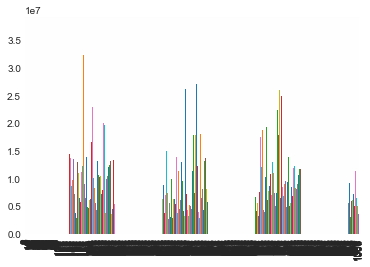

In [21]:
df['price'].plot.bar()

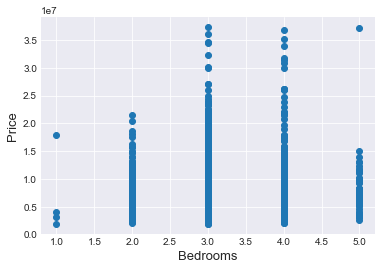

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = df['bedrooms'], y = df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Bedrooms', fontsize=13)
plt.show()

In [ ]:
#Our maximum houses are 3 to 4 bedrooms.by each room the house price is increasing but 5 bedroom prices is low.

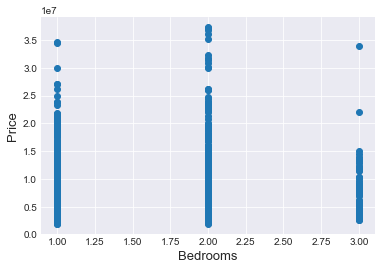

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = df['bathrooms'], y = df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Bedrooms', fontsize=13)
plt.show()

In [ ]:
#Our maximum houses are 3 to 4 bathrooms. House prices is partially consistent with bedrooms.
#a small change can be seen.

In [24]:
#Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm=LinearRegression()

X=df[['bedrooms','bathrooms','property_type','parking_space']]
X.head()



,bedrooms,bathrooms,property_type,parking_space
0,2.0,1.0,house,1.0
1,3.0,2.0,house,0.0
2,3.0,1.0,house,1.0
3,3.0,1.0,house,2.0
4,4.0,2.0,house,2.0


In [401]:
#We have to clean data, find Nan or None values and remove them

In [25]:
print (X.bedrooms.unique())
print (X.bathrooms.unique())
print (X.property_type.unique())
print (X.parking_space.unique())

[ 2.  3.  4. nan  5.  1.]
[ 1.  2. nan  3.]
['house' None]
[ 1.  0.  2.  3. nan]


In [409]:
#In Four columns we have nan values, we have to remove it.

In [27]:
X.fillna(0, inplace=True)
print (X.bedrooms.unique())
print (X.bathrooms.unique())
print (X.property_type.unique())
print (X.parking_space.unique())

[2. 3. 4. 0. 5. 1.]
[1. 2. 0. 3.]
['house' 0]
[1. 0. 2. 3.]


C:\Users\junaid.raza\AppData\Local\Continuum\anaconda4\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [29]:
Y=df['price']
Y.fillna(0, inplace=True)

In [30]:
X_train= X[:-250]
X_test=X[-250:]

Y_train= Y[:-250]
Y_test=Y[-250:]

In [31]:
#regr= linear_model.LinearRegression()
lm.fit(X_train, Y_train)
plt.plot(X_test,lm.predict(X_test),color='red', linewidth=3)

plt.show()
#print (str(round (lm.predict(5000))))

ValueError: could not convert string to float: 'house'

In [441]:
print (lm.coef_)

[ -44895.05017618  110155.92824438 3588323.82397494  228779.83378939]


In [1]:
Y_predicted = lm.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_predicted))

NameError: name 'lm' is not defined

In [445]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_predicted))

Variance score: 0.01
